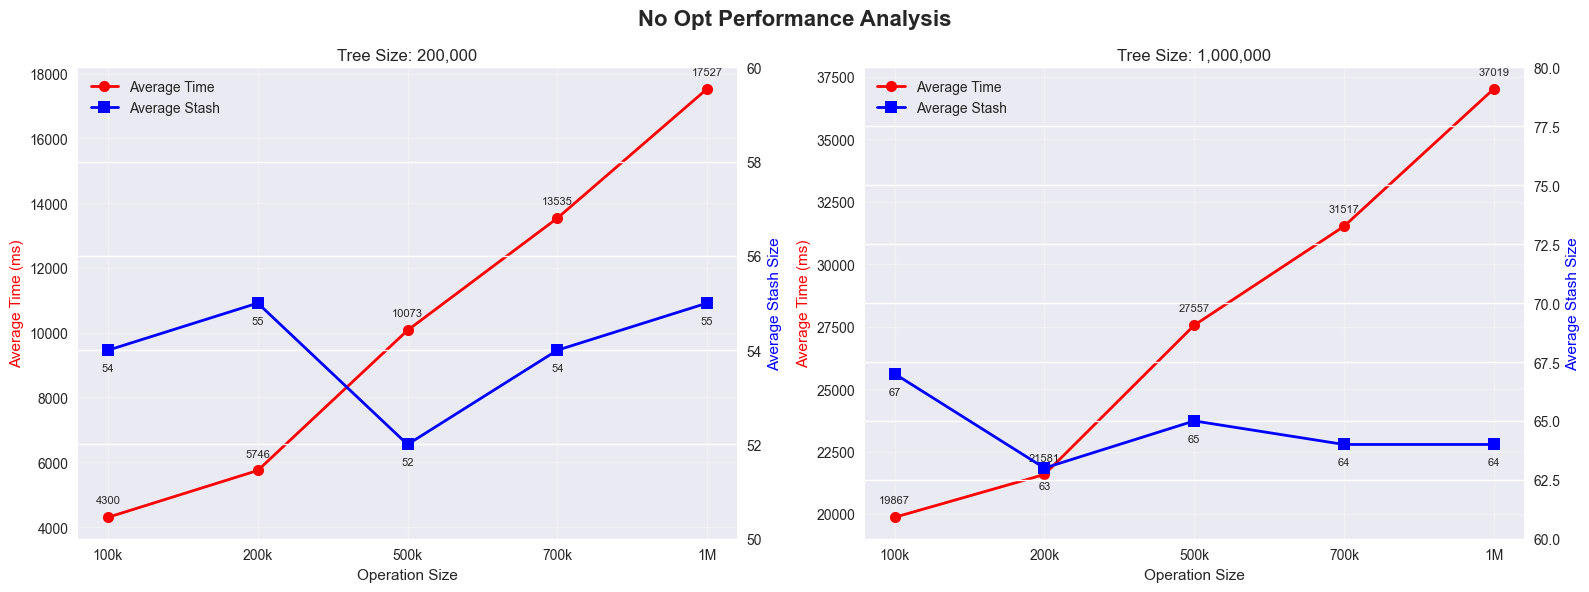


=== No Opt Algorithm Summary (Tree Size: 200,000) ===
Average Time per Operation: 0.03 ms
Average Stash Size: 54.0
Time per Operation Range: 0.02 - 0.04 ms
Stash Range: 52 - 55

Detailed Performance Table for No Opt (Tree Size: 200,000):
Operation Size  Tree Size    Avg Time/Op  Min Time/Op  Max Time/Op  Avg Stash    Min Stash    Max Stash   
--------------------------------------------------------------------------------
100000.0        200000.0     0.04         0.04         0.04         54           51           60          
200000.0        200000.0     0.03         0.03         0.03         55           52           59          
500000.0        200000.0     0.02         0.02         0.02         52           50           55          
700000.0        200000.0     0.02         0.02         0.02         54           50           59          
1000000.0       200000.0     0.02         0.02         0.02         55           52           60          

=== No Opt Algorithm Summary (Tree Si

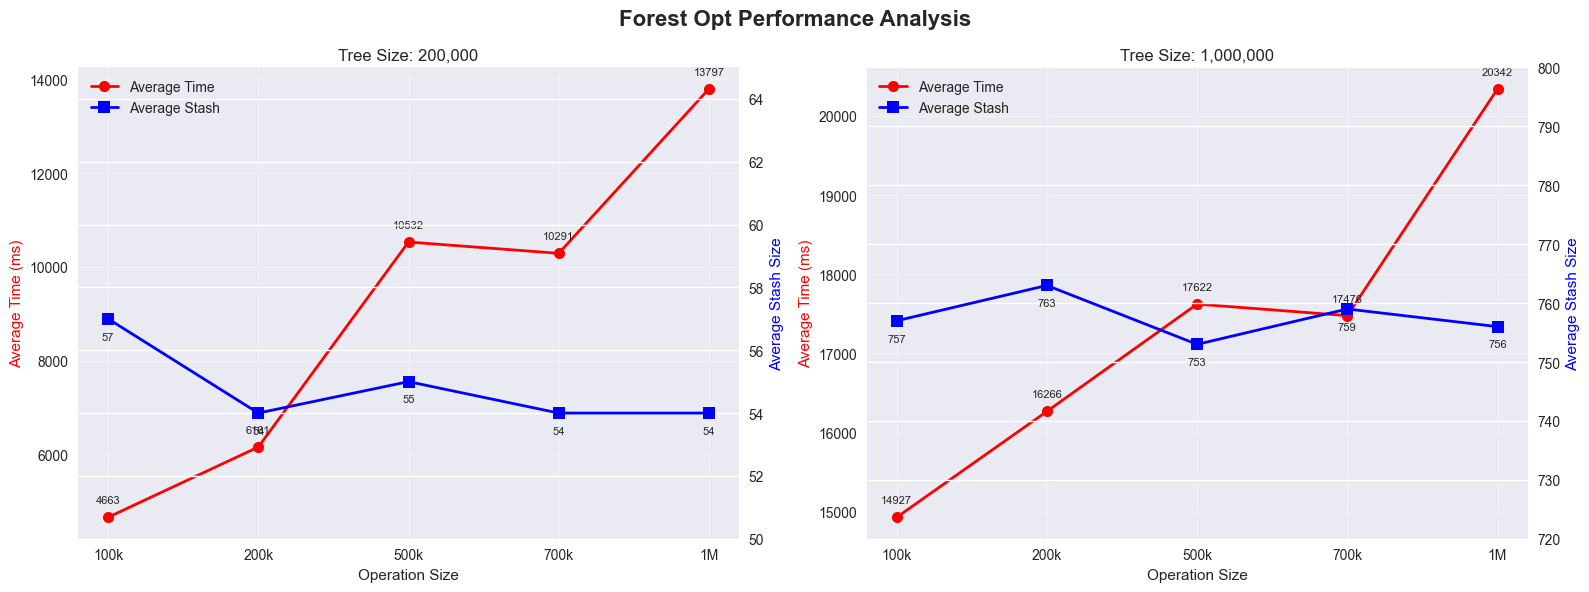


=== Forest Opt Algorithm Summary (Tree Size: 200,000) ===
Average Time per Operation: 0.03 ms
Average Stash Size: 54.8
Time per Operation Range: 0.01 - 0.05 ms
Stash Range: 54 - 57

Detailed Performance Table for Forest Opt (Tree Size: 200,000):
Operation Size  Tree Size    Avg Time/Op  Min Time/Op  Max Time/Op  Avg Stash    Min Stash    Max Stash   
--------------------------------------------------------------------------------
100000.0        200000.0     0.05         0.05         0.05         57           53           61          
200000.0        200000.0     0.03         0.03         0.03         54           52           60          
500000.0        200000.0     0.02         0.02         0.02         55           51           61          
700000.0        200000.0     0.01         0.01         0.01         54           52           59          
1000000.0       200000.0     0.01         0.01         0.01         54           51           61          

=== Forest Opt Algorithm Summ

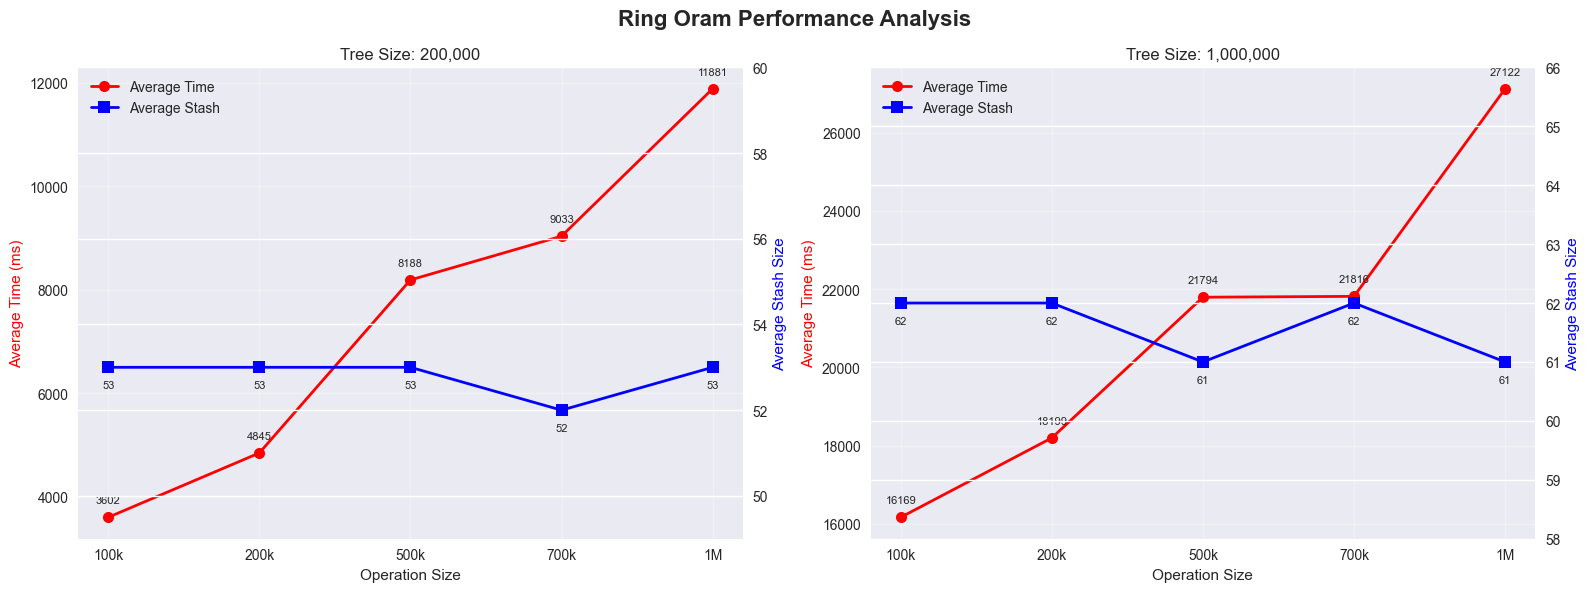


=== Ring Oram Algorithm Summary (Tree Size: 200,000) ===
Average Time per Operation: 0.02 ms
Average Stash Size: 52.8
Time per Operation Range: 0.01 - 0.04 ms
Stash Range: 52 - 53

Detailed Performance Table for Ring Oram (Tree Size: 200,000):
Operation Size  Tree Size    Avg Time/Op  Min Time/Op  Max Time/Op  Avg Stash    Min Stash    Max Stash   
--------------------------------------------------------------------------------
100000.0        200000.0     0.04         0.04         0.04         53           49           59          
200000.0        200000.0     0.02         0.02         0.02         53           50           59          
500000.0        200000.0     0.02         0.02         0.02         53           52           56          
700000.0        200000.0     0.01         0.01         0.01         52           49           59          
1000000.0       200000.0     0.01         0.01         0.01         53           49           60          

=== Ring Oram Algorithm Summary

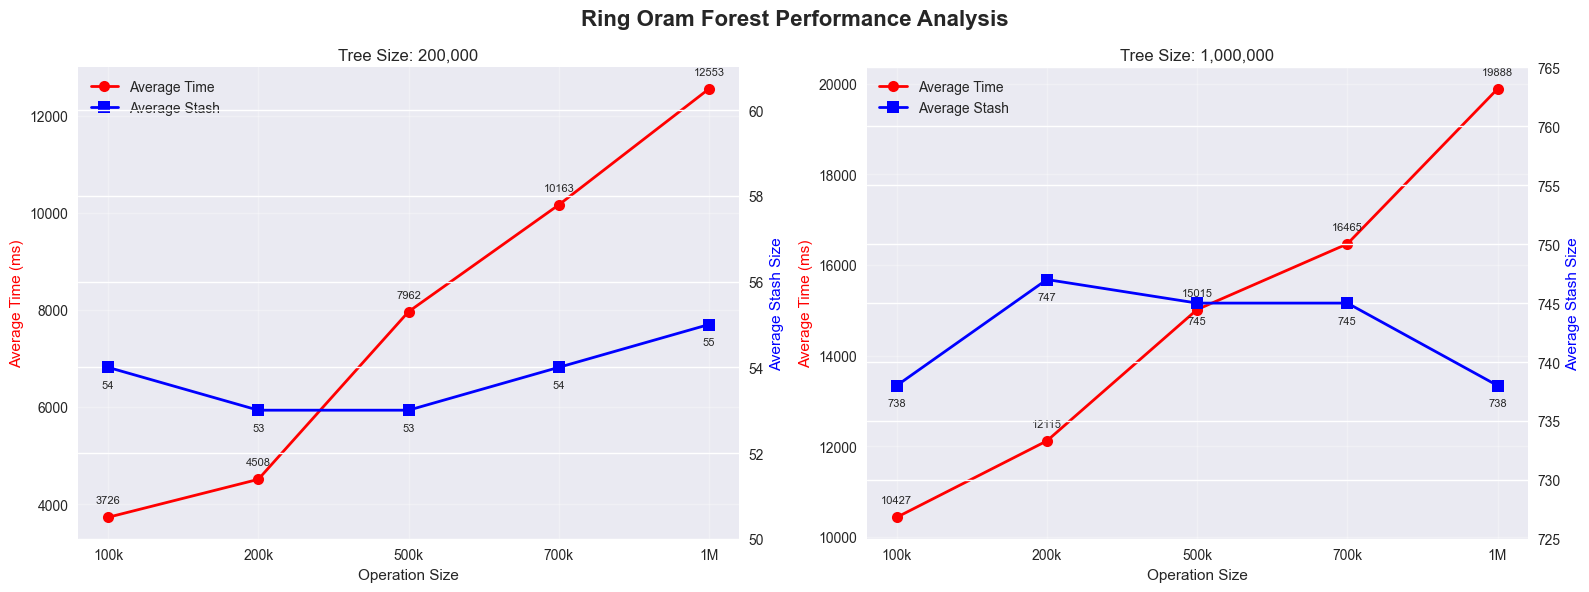


=== Ring Oram Forest Algorithm Summary (Tree Size: 200,000) ===
Average Time per Operation: 0.02 ms
Average Stash Size: 53.8
Time per Operation Range: 0.01 - 0.04 ms
Stash Range: 53 - 55

Detailed Performance Table for Ring Oram Forest (Tree Size: 200,000):
Operation Size  Tree Size    Avg Time/Op  Min Time/Op  Max Time/Op  Avg Stash    Min Stash    Max Stash   
--------------------------------------------------------------------------------
100000.0        200000.0     0.04         0.03         0.05         54           50           59          
200000.0        200000.0     0.02         0.02         0.02         53           51           56          
500000.0        200000.0     0.02         0.02         0.02         53           51           55          
700000.0        200000.0     0.01         0.01         0.01         54           50           59          
1000000.0       200000.0     0.01         0.01         0.01         55           50           61          

=== Ring Oram For

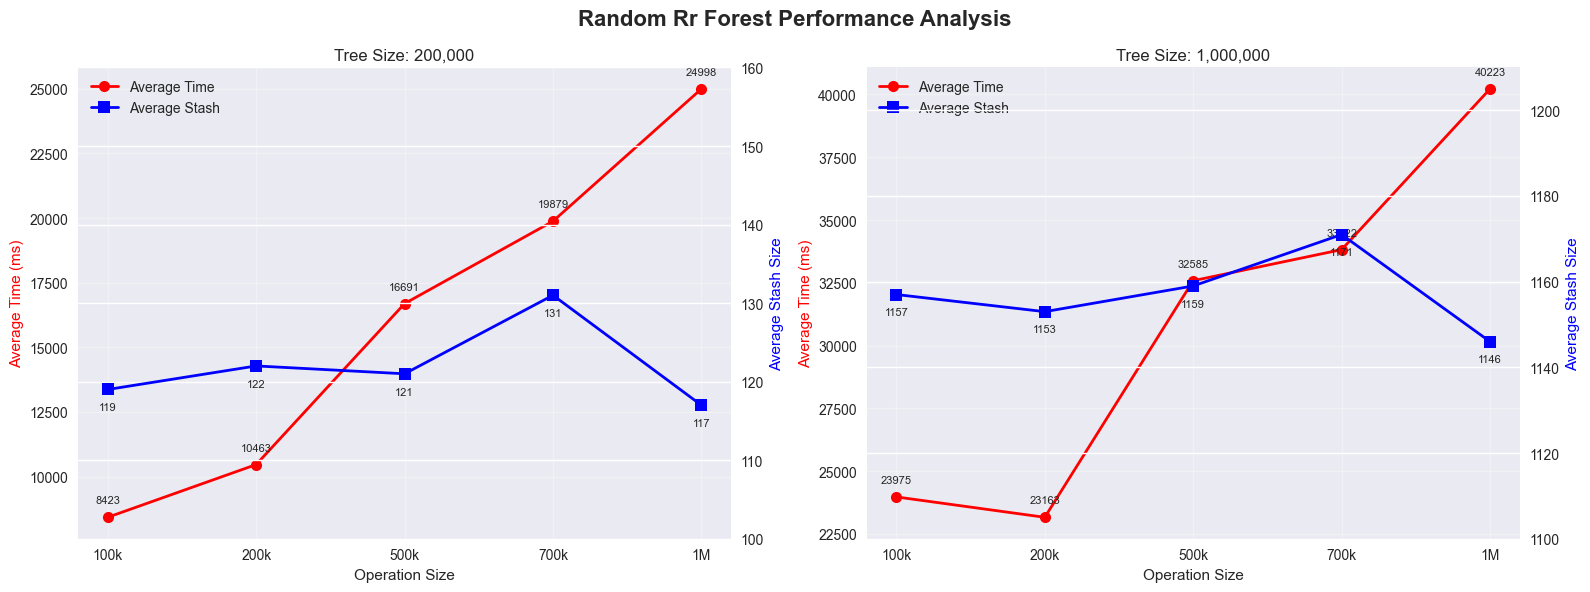


=== Random Rr Forest Algorithm Summary (Tree Size: 200,000) ===
Average Time per Operation: 0.04 ms
Average Stash Size: 122.0
Time per Operation Range: 0.02 - 0.08 ms
Stash Range: 117 - 131

Detailed Performance Table for Random Rr Forest (Tree Size: 200,000):
Operation Size  Tree Size    Avg Time/Op  Min Time/Op  Max Time/Op  Avg Stash    Min Stash    Max Stash   
--------------------------------------------------------------------------------
100000.0        200000.0     0.08         0.08         0.09         119          104          129         
200000.0        200000.0     0.05         0.05         0.05         122          104          141         
500000.0        200000.0     0.03         0.03         0.03         121          100          142         
700000.0        200000.0     0.03         0.03         0.03         131          114          154         
1000000.0       200000.0     0.02         0.02         0.03         117          106          127         

=== Random Rr 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

stash_ranges = {
    'no_opt_200k': (50, 60),
    'no_opt_1m': (60, 80),
    'forest_opt_200k': (50, 65),
    'forest_opt_1m': (720, 800),
    'ring_oram_200k': (49, 60),
    'ring_oram_1m': (58, 66),
    'ring_oram_forest_200k': (50, 61),
    'ring_oram_forest_1m': (725, 765),
    'random_rr_forest_200k': (100, 160),
    'random_rr_forest_1m': (1100, 1210)


colors = {
    'no_opt': '#1f77b4',
    'forest_opt': '#ff7f0e', 
    'ring_oram': '#2ca02c',
    'ring_oram_forest': '#d62728',
    'random_rr_forest': '#9467bd'
}

csv_files = {
    'no_opt': 'result_no_opt.csv',
    'forest_opt': 'result_forest_opt.csv',
    'ring_oram': 'result_ring_oram.csv',
    'ring_oram_forest': 'result_ring_oram_forest.csv',
    'random_rr_forest': 'result_random_rr_forest.csv'
}

dataframes = {}
for name, file in csv_files.items():
    dataframes[name] = pd.read_csv(file)

for name, df in dataframes.items():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    fig.suptitle(f'{name.replace("_", " ").title()} Performance Analysis', 
                 fontsize=16, fontweight='bold')
    
    subset_200k = df[df['tree_size'] == 200000]
    
    x_positions = [0, 1, 2, 3, 4]
    x_labels = ['100k', '200k', '500k', '700k', '1M']
    
    line1 = ax1.plot(x_positions, subset_200k['avg_time'], 
                     marker='o', linewidth=2, markersize=8, color='red', 
                     label='Average Time')
    
    ax1_twin = ax1.twinx()
    line2 = ax1_twin.plot(x_positions, subset_200k['avg_stash'], 
                          marker='s', linewidth=2, markersize=8, color='blue', 
                          label='Average Stash')
    
    for i, y in enumerate(subset_200k['avg_time']):
        ax1.annotate(f'{y:.0f}', (i, y), textcoords="offset points", 
                     xytext=(0,10), ha='center', fontsize=8)
    
    for i, y in enumerate(subset_200k['avg_stash']):
        ax1_twin.annotate(f'{y:.0f}', (i, y), textcoords="offset points", 
                          xytext=(0,-15), ha='center', fontsize=8)
    
    ax1.set_xlabel('Operation Size')
    ax1.set_ylabel('Average Time (ms)', color='red')
    ax1_twin.set_ylabel('Average Stash Size', color='blue')
    ax1_twin.set_ylim(stash_ranges[f'{name}_200k'])
    ax1.set_title('Tree Size: 200,000')
    ax1.grid(True, alpha=0.3)
    
    ax1.set_xticks(x_positions)
    ax1.set_xticklabels(x_labels)
    
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax1_twin.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    
    subset_1m = df[df['tree_size'] == 1000000]
    
    line3 = ax2.plot(x_positions, subset_1m['avg_time'], 
                     marker='o', linewidth=2, markersize=8, color='red', 
                     label='Average Time')
    
    ax2_twin = ax2.twinx()
    line4 = ax2_twin.plot(x_positions, subset_1m['avg_stash'], 
                          marker='s', linewidth=2, markersize=8, color='blue', 
                          label='Average Stash')
    
    for i, y in enumerate(subset_1m['avg_time']):
        ax2.annotate(f'{y:.0f}', (i, y), textcoords="offset points", 
                     xytext=(0,10), ha='center', fontsize=8)
    
    for i, y in enumerate(subset_1m['avg_stash']):
        ax2_twin.annotate(f'{y:.0f}', (i, y), textcoords="offset points", 
                          xytext=(0,-15), ha='center', fontsize=8)
    
    ax2.set_xlabel('Operation Size')
    ax2.set_ylabel('Average Time (ms)', color='red')
    ax2_twin.set_ylabel('Average Stash Size', color='blue')
    ax2_twin.set_ylim(stash_ranges[f'{name}_1m'])
    ax2.set_title('Tree Size: 1,000,000')
    ax2.grid(True, alpha=0.3)
    
    ax2.set_xticks(x_positions)
    ax2.set_xticklabels(x_labels)
    
    lines3, labels3 = ax2.get_legend_handles_labels()
    lines4, labels4 = ax2_twin.get_legend_handles_labels()
    ax2.legend(lines3 + lines4, labels3 + labels4, loc='upper left')
    
    plt.tight_layout()
    plt.show()
    

    subset_200k = df[df['tree_size'] == 200000].copy()

    subset_200k.loc[:, 'time_per_op'] = subset_200k['avg_time'] / subset_200k['operate_size']
    
    print(f"\n=== {name.replace('_', ' ').title()} Algorithm Summary (Tree Size: 200,000) ===")
    print(f"Average Time per Operation: {subset_200k['time_per_op'].mean():.2f} ms")
    print(f"Average Stash Size: {subset_200k['avg_stash'].mean():.1f}")
    print(f"Time per Operation Range: {subset_200k['time_per_op'].min():.2f} - {subset_200k['time_per_op'].max():.2f} ms")
    print(f"Stash Range: {subset_200k['avg_stash'].min():.0f} - {subset_200k['avg_stash'].max():.0f}")
    
    print(f"\nDetailed Performance Table for {name.replace('_', ' ').title()} (Tree Size: 200,000):")
    print("=" * 80)
    print(f"{'Operation Size':<15} {'Tree Size':<12} {'Avg Time/Op':<12} {'Min Time/Op':<12} {'Max Time/Op':<12} {'Avg Stash':<12} {'Min Stash':<12} {'Max Stash':<12}")
    print("-" * 80)
    
    for _, row in subset_200k.iterrows():
        min_time_per_op = row['min_time'] / row['operate_size']
        max_time_per_op = row['max_time'] / row['operate_size']
        print(f"{row['operate_size']:<15} {row['tree_size']:<12} {row['time_per_op']:<12.2f} {min_time_per_op:<12.2f} {max_time_per_op:<12.2f} {row['avg_stash']:<12.0f} {row['min_stash']:<12.0f} {row['max_stash']:<12.0f}")
    
    print("=" * 80)
    

    subset_1m = df[df['tree_size'] == 1000000].copy()

    subset_1m.loc[:, 'time_per_op'] = subset_1m['avg_time'] / subset_1m['operate_size']
    
    print(f"\n=== {name.replace('_', ' ').title()} Algorithm Summary (Tree Size: 1,000,000) ===")
    print(f"Average Time per Operation: {subset_1m['time_per_op'].mean():.2f} ms")
    print(f"Average Stash Size: {subset_1m['avg_stash'].mean():.1f}")
    print(f"Time per Operation Range: {subset_1m['time_per_op'].min():.2f} - {subset_1m['time_per_op'].max():.2f} ms")
    print(f"Stash Range: {subset_1m['avg_stash'].min():.0f} - {subset_1m['avg_stash'].max():.0f}")
    
    print(f"\nDetailed Performance Table for {name.replace('_', ' ').title()} (Tree Size: 1,000,000):")
    print("=" * 80)
    print(f"{'Operation Size':<15} {'Tree Size':<12} {'Avg Time/Op':<12} {'Min Time/Op':<12} {'Max Time/Op':<12} {'Avg Stash':<12} {'Min Stash':<12} {'Max Stash':<12}")
    print("-" * 80)
    
    for _, row in subset_1m.iterrows():
        min_time_per_op = row['min_time'] / row['operate_size']
        max_time_per_op = row['max_time'] / row['operate_size']
        print(f"{row['operate_size']:<15} {row['tree_size']:<12} {row['time_per_op']:<12.2f} {min_time_per_op:<12.2f} {max_time_per_op:<12.2f} {row['avg_stash']:<12.0f} {row['min_stash']:<12.0f} {row['max_stash']:<12.0f}")
    
    print("=" * 80)
    print()

print("\n" + "="*100)
print("COMPREHENSIVE COMPARISON TABLE (Tree Size: 200,000)")
print("="*100)

comparison_data_200k = []
for name, df in dataframes.items():
    subset_200k = df[df['tree_size'] == 200000].copy()
    subset_200k.loc[:, 'time_per_op'] = subset_200k['avg_time'] / subset_200k['operate_size']
    comparison_data_200k.append({
        'Algorithm': name.replace('_', ' ').title(),
        'Avg Time per Op (ms)': subset_200k['time_per_op'].mean(),
        'Min Time per Op (ms)': subset_200k['time_per_op'].min(),
        'Max Time per Op (ms)': subset_200k['time_per_op'].max(),
        'Avg Stash': subset_200k['avg_stash'].mean(),
        'Min Stash': subset_200k['avg_stash'].min(),
        'Max Stash': subset_200k['avg_stash'].max(),
        'Time per Op Std Dev': subset_200k['time_per_op'].std(),
        'Stash Std Dev': subset_200k['avg_stash'].std()
    })

comparison_df_200k = pd.DataFrame(comparison_data_200k)
print(comparison_df_200k.to_string(index=False, float_format='%.2f'))

print("\n" + "="*100)
print("COMPREHENSIVE COMPARISON TABLE (Tree Size: 1,000,000)")
print("="*100)

comparison_data_1m = []
for name, df in dataframes.items():
    subset_1m = df[df['tree_size'] == 1000000].copy()
    subset_1m.loc[:, 'time_per_op'] = subset_1m['avg_time'] / subset_1m['operate_size']
    comparison_data_1m.append({
        'Algorithm': name.replace('_', ' ').title(),
        'Avg Time per Op (ms)': subset_1m['time_per_op'].mean(),
        'Min Time per Op (ms)': subset_1m['time_per_op'].min(),
        'Max Time per Op (ms)': subset_1m['time_per_op'].max(),
        'Avg Stash': subset_1m['avg_stash'].mean(),
        'Min Stash': subset_1m['avg_stash'].min(),
        'Max Stash': subset_1m['avg_stash'].max(),
        'Time per Op Std Dev': subset_1m['time_per_op'].std(),
        'Stash Std Dev': subset_1m['avg_stash'].std()
    })

comparison_df_1m = pd.DataFrame(comparison_data_1m)
print(comparison_df_1m.to_string(index=False, float_format='%.2f'))

print("\n" + "="*80)
print("PERFORMANCE RANKINGS (Tree Size: 200,000)")
print("="*80)

time_ranking_200k = comparison_df_200k.sort_values('Avg Time per Op (ms)')
print("\nTime per Operation Performance Ranking (Best to Worst):")
for i, (_, row) in enumerate(time_ranking_200k.iterrows(), 1):
    print(f"{i}. {row['Algorithm']}: {row['Avg Time per Op (ms)']:.2f} ms")

stash_ranking_200k = comparison_df_200k.sort_values('Avg Stash')
print("\nStash Size Ranking (Best to Worst):")
for i, (_, row) in enumerate(stash_ranking_200k.iterrows(), 1):
    print(f"{i}. {row['Algorithm']}: {row['Avg Stash']:.1f}")

print("\n" + "="*80)
print("PERFORMANCE RANKINGS (Tree Size: 1,000,000)")
print("="*80)

time_ranking_1m = comparison_df_1m.sort_values('Avg Time per Op (ms)')
print("\nTime per Operation Performance Ranking (Best to Worst):")
for i, (_, row) in enumerate(time_ranking_1m.iterrows(), 1):
    print(f"{i}. {row['Algorithm']}: {row['Avg Time per Op (ms)']:.2f} ms")

stash_ranking_1m = comparison_df_1m.sort_values('Avg Stash')
print("\nStash Size Ranking (Best to Worst):")
for i, (_, row) in enumerate(stash_ranking_1m.iterrows(), 1):
    print(f"{i}. {row['Algorithm']}: {row['Avg Stash']:.1f}")

print("\n" + "="*80) 